In [1]:
# import the libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report as cr
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
# pip install pandas_ml
from pandas_ml import ConfusionMatrix
import numpy as np
# from sklearn import cross_validation as cv
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn.externals.six import StringIO 


In [2]:
path="D:\\Imarticus\\Python\\titanic.csv"
titanic = pd.read_csv(path)
titanic.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
 #print the columns
# --------------------------------------
col = list(titanic.columns)
print(col)

# count of Rows and Columns 
# -----------------------------
titanic.shape


['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


(891, 12)

In [6]:
# total number of rows
# --------------------------------------
len(titanic.index)

# print the records for view
# --------------------------------------
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic.dtypes
titanic.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
# Romoving unwanted columns
       
titanic = titanic.drop('Name', axis = 1)
titanic = titanic.drop('Cabin', axis = 1)
titanic = titanic.drop('Ticket', axis = 1)
titanic = titanic.drop('PassengerId', axis = 1)


In [9]:
titanic.head()

print(titanic.SibSp.value_counts())
print(titanic.Parch.value_counts())
print(titanic.Embarked.value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64
S    644
C    168
Q     77
Name: Embarked, dtype: int64


In [10]:
# need the Y-variable to be Numeric (0 and 1) for Logistic Regression
# steps:
# 1) create a new Y-variable and initialise with 0/1 appropriately
# 2) delete the old Y value 
# -----------------------------------------------------------------

titanic['Gender'] = 0
titanic.Gender[titanic.Sex == "male"] = 1
titanic.Gender[titanic.Sex == "female"] = 0

titanic.head()

C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Pranit\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,0
2,1,3,female,26.0,0,0,7.9250,S,0
3,1,1,female,35.0,1,0,53.1000,S,0
4,0,3,male,35.0,0,0,8.0500,S,1


In [11]:
titanic = titanic.drop('Sex',axis=1)

In [13]:
titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender
0,0,3,22.0,1,0,7.2500,S,1
1,1,1,38.0,1,0,71.2833,C,0
2,1,3,26.0,0,0,7.9250,S,0
3,1,1,35.0,1,0,53.1000,S,0
4,0,3,35.0,0,0,8.0500,S,1


In [14]:
# get the count of "YES" (1) and "NO" (0)
# --------------------------------------
titanic['Survived'].value_counts()
titanic['Survived'].value_counts()/len(titanic)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

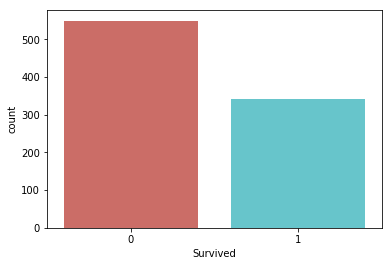

In [15]:
# plot the "Yes" and "No"
# --------------------------------------
sns.countplot(x='Survived', data=titanic, palette='hls')


In [16]:
titanic.Embarked.unique()
titanic = titanic.dropna(subset = ['Embarked'])
titanic = titanic.dropna(subset = ['Age'])

pd.get_dummies(titanic.Embarked,drop_first=True).tail(20)
pd.get_dummies(titanic.Embarked,drop_first=False).head(20)


,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0
10,0,0,1


In [17]:
# create the dummy variables
# for every column having more than 1 value, 
# create dummy variables
# this is done since there are characters in the factor variables
# ---------------------------------------------------------------



new_titanic = titanic.copy()
titanic.head()

# Get all the factor X-variables

factor_x = titanic.select_dtypes(exclude=["int64","float64","category"]).columns.values
print(factor_x)

['Embarked']


In [18]:
# convert all X-categorical variables
# ---------------------------------
for c in factor_x:
    titanic[c] = titanic[c].astype('category',copy=False)
titanic.dtypes


Survived       int64
Pclass         int64
Age          float64
SibSp          int64
Parch          int64
Fare         float64
Embarked    category
Gender         int64
dtype: object

In [19]:
# del cat_list

for var in factor_x:
    cat_list = pd.get_dummies(titanic[var], drop_first=True, prefix=var)
    # data1=bank.join(cat_list)
    new_titanic = new_titanic.join(cat_list)

new_titanic.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Gender,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,S,1,0,1
1,1,1,38.0,1,0,71.2833,C,0,0,0
2,1,3,26.0,0,0,7.9250,S,0,0,1
3,1,1,35.0,1,0,53.1000,S,0,0,1
4,0,3,35.0,0,0,8.0500,S,1,0,1


In [20]:
# old+dummy columns
new_col_set = new_titanic.columns
print(new_col_set)
len(new_col_set)

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked',
       'Gender', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


10

In [21]:
# data with new columns
new_titanic.head()

# get the difference of new and old columns
to_keep = list(set(new_col_set).difference(set(factor_x)))
to_keep
to_keep.sort()
to_keep
len(to_keep)


9

In [22]:
# create the final dataset with the final columns set
# ---------------------------------------------------
titanic_final = new_titanic[to_keep]
titanic_final.head()
titanic_final.columns.sort_values()
len(titanic_final.columns)


9

In [23]:
# reordering the columns
# ---------------------------------------------------
titanic_final = pd.concat(
        [titanic_final['Survived'], 
        titanic_final.drop('Survived',axis=1)],
        axis=1)

titanic_final.columns

Index(['Survived', 'Age', 'Embarked_Q', 'Embarked_S', 'Fare', 'Gender',
       'Parch', 'Pclass', 'SibSp'],
      dtype='object')

In [24]:
import random as r


# split the dataset into train and test
# ---------------------------------------------------
train, test = train_test_split(titanic_final, test_size = 0.3)

print(train.shape)
print(test.shape)

(498, 9)
(214, 9)


In [25]:
total_cols = len(titanic_final.columns)
print(total_cols)


9


In [26]:
# split the train and test into X and Y variables
train_x = train.iloc[:,1:total_cols+1]
train_y = train.iloc[:,0]

train_x.iloc[0:5]

test_x  = test.iloc[:,1:total_cols+1]
test_y = test.iloc[:,0]
len(train_x)
len(test_x)


214

In [27]:
# build the base model with all columns
# -------------------------------------

# build the logistic regression model

logit_model = sm.Logit(train_y, train_x)
logit_result = logit_model.fit()
logit_result.summary2()


Optimization terminated successfully.
         Current function value: 0.490382
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.263     
Dependent Variable: Survived         AIC:              504.4205  
Date:               2019-02-20 20:17 BIC:              538.1053  
No. Observations:   498              Log-Likelihood:   -244.21   
Df Model:           7                LL-Null:          -331.55   
Df Residuals:       490              LLR p-value:      2.5808e-34
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Age            0.0051    0.0074   0.6888  0.4909  -0.0094   0.0196
Embarked_Q    -0.2978    0.7661  -0.3887  0.6975  -1.7992   1.2036
Embarked_S     0.2140    0.2985   0.7170  0.4734  -0.3710   0.7991
Fare           0.0160    0.0035   4.5566  0.0000   0.0091   0.0228
Gender        -2.3675    0.2424  -9.7656  0.0000  -2.8427  -1.8924
Parch         -0.2728    0.1502  -1.8167  0.0693  -0.5671   0.0215
Pclass         0.0485    0.1160   0.4184  0.6756  -0.1788   0.2759
SibSp         -0.1128    0.1400  -0.8058  0.4204  -0.3873   0.1616
=================================================================

"""

In [28]:
# cross-validation
# ----------------
# number of folds
kf = KFold(n_splits=5) 
kf.get_n_splits(train_x)
print(kf)

fold = 1
# split the training further into train and test
for train_index, test_index in kf.split(train_x):
    
    cv_train_x = train_x.iloc[train_index,]
    cv_train_y = train_y.iloc[train_index,]
    
    cv_test_x = train_x.iloc[test_index,]
    cv_test_y = train_y.iloc[test_index,]
    
    # build the model on the CV training data and predict on CV testing data
    cv_logit_model = sm.Logit(cv_train_y, cv_train_x).fit()
    cv_pdct = list(cv_logit_model.predict(cv_test_x))

    # set the default cut-off to 0.5
    # and set predictions to 0 and 1
    cv_length = len(cv_pdct)
    cv_results=list(cv_pdct).copy()
        
    for i in range(0,cv_length):
        if cv_pdct[i] <= 0.5:
            cv_results[i] = 0
        else:
            cv_results[i] = 1
    
    # accuracy score
    acc_score = accuracy_score(cv_test_y,cv_results)*100
    print('Fold={0},Accuracy={1}'.format(fold,acc_score) )
    
    fold+=1




KFold(n_splits=5, random_state=None, shuffle=False)
Optimization terminated successfully.
         Current function value: 0.497329
         Iterations 6
Fold=1,Accuracy=80.0
Optimization terminated successfully.
         Current function value: 0.501479
         Iterations 6
Fold=2,Accuracy=79.0
Optimization terminated successfully.
         Current function value: 0.484335
         Iterations 6
Fold=3,Accuracy=76.0
Optimization terminated successfully.
         Current function value: 0.477763
         Iterations 7
Fold=4,Accuracy=75.75757575757575
Optimization terminated successfully.
         Current function value: 0.482505
         Iterations 6
Fold=5,Accuracy=73.73737373737373


In [29]:
# predict on the test set
# ---------------------------------------------------
pred_y = logit_result.predict(test_x)
y_results = list(pred_y)
pred_y
length = len(y_results)
length
# set the default cut-off to 0.5
# and set predictions to 0 and 1
for i in range(0,length):
    if y_results[i] <= 0.5:
        y_results[i] = 0
    else:
        y_results[i] = 1
        
# accuracy score
print(accuracy_score(test_y,y_results)*100)

75.70093457943925


In [30]:
# confusion matrix
cm=ConfusionMatrix(list(y_results),list(test_y))
print(cm)
cm.print_stats()

Predicted  False  True  __all__
Actual                         
False        105    40      145
True          12    57       69
__all__      117    97      214
population: 214
P: 69
N: 145
PositiveTest: 97
NegativeTest: 117
TP: 57
TN: 105
FP: 40
FN: 12
TPR: 0.8260869565217391
TNR: 0.7241379310344828
PPV: 0.5876288659793815
NPV: 0.8974358974358975
FPR: 0.27586206896551724
FDR: 0.41237113402061853
FNR: 0.17391304347826086
ACC: 0.7570093457943925
F1_score: 0.6867469879518072
MCC: 0.5166185293886169
informedness: 0.5502248875562219
markedness: 0.48506476341527893
prevalence: 0.32242990654205606
LRP: 2.994565217391304
LRN: 0.2401656314699793
DOR: 12.46875
FOR: 0.10256410256410256


In [31]:
# Classification report : precision, recall, F-score
print(cr(test_y, y_results))


              precision    recall  f1-score   support

           0       0.72      0.90      0.80       117
           1       0.83      0.59      0.69        97

   micro avg       0.76      0.76      0.76       214
   macro avg       0.78      0.74      0.74       214
weighted avg       0.77      0.76      0.75       214



0.7425323817076396


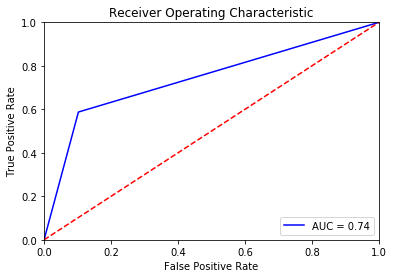

In [32]:
# draw the ROC curve
from sklearn import metrics
import matplotlib.pyplot as plt

fpr, tpr, threshold = metrics.roc_curve(test_y, y_results)
roc_auc = metrics.auc(fpr,tpr)
print(roc_auc)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
######## Same data with Decision Tree ############


# gini model
# entropy model
# -------------------------------------

# Model 1) DT with gini index criteria
# -------------------------------------
clf_gini = dtc(criterion = "gini", random_state = 100, 
               max_depth=3, min_samples_leaf=5)

fit1 = clf_gini.fit(train_x, train_y)
print(fit1)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')


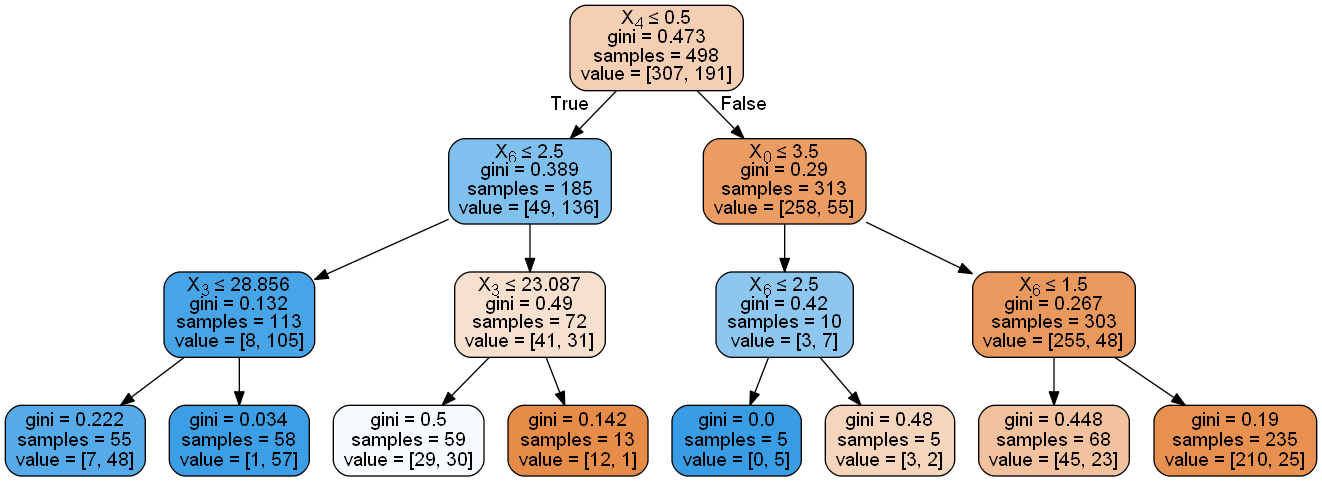

In [34]:
# to view the graph
from sklearn import tree
# tree visualisation
# -------------------------------------
dot_data = StringIO()

tree.export_graphviz(fit1, out_file=dot_data,  
                filled=True, rounded=True, special_characters=True)
import pydotplus

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
from IPython.display import Image

Image(graph.create_png())


In [35]:
# predictions
# -------------------------------------
pred_gini = fit1.predict(test_x)
len(test_x)
pred_gini
len(test_y)
len(pred_gini)
print("Gini Accuracy is ", 
      accuracy_score(test_y,pred_gini)*100)


Gini Accuracy is  78.97196261682244


In [36]:
# create dataframe with the actual and predicted results
# -------------------------------------------------------
df_results1 = pd.DataFrame({'actual':test_y, 
                            'predicted':pred_gini})
df_results1
len(df_results1)


214

In [37]:
# another nice way to plot the results
# -------------------------------------
cm1=ConfusionMatrix(list(test_y), list(pred_gini))
cm1

Predicted  False  True  __all__
Actual                         
False        107    10      117
True          35    62       97
__all__      142    72      214

population: 214
P: 97
N: 117
PositiveTest: 72
NegativeTest: 142
TP: 62
TN: 107
FP: 10
FN: 35
TPR: 0.6391752577319587
TNR: 0.9145299145299145
PPV: 0.8611111111111112
NPV: 0.7535211267605634
FPR: 0.08547008547008547
FDR: 0.1388888888888889
FNR: 0.36082474226804123
ACC: 0.7897196261682243
F1_score: 0.7337278106508875
MCC: 0.5833738502439377
informedness: 0.5537051722618731
markedness: 0.6146322378716746
prevalence: 0.4532710280373832
LRP: 7.478350515463917
LRN: 0.3945466807977647
DOR: 18.95428571428571
FOR: 0.24647887323943662


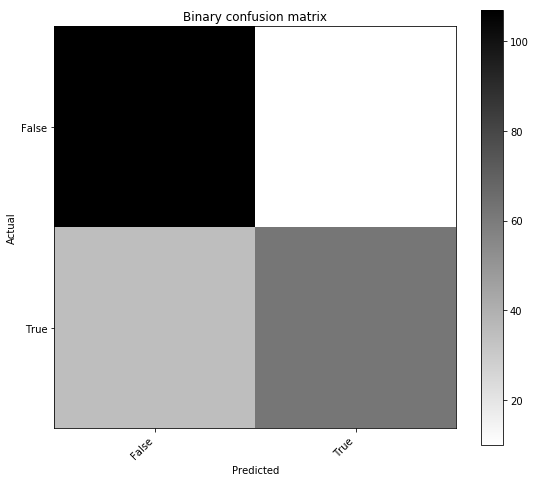

In [38]:
# plot
# -------------------------------------
cm1
cm1.plot()
cm1.print_stats()


In [39]:
#Model 2) DT with Entropy(Information Gain) criteria
# ----------------------------------------------------
clf_entropy=dtc(criterion="entropy", 
                random_state=100, max_depth=3, 
                min_samples_leaf=5)

fit2 = clf_entropy.fit(train_x,train_y)
print(fit2)

pred_entropy = fit2.predict(test_x)

pred_entropy
len(test_y)
len(pred_entropy)
print("Entropy Accuracy is ", 
      accuracy_score(test_y,pred_entropy)*100)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')
Entropy Accuracy is  78.50467289719626


In [40]:
df_results2 = pd.DataFrame({'actual':test_y, 
                            'predicted':pred_entropy})
df_results2

# another nice way to plot the results
# -------------------------------------
cm2=ConfusionMatrix(list(test_y), list(pred_entropy))
cm2

Predicted  False  True  __all__
Actual                         
False        105    12      117
True          34    63       97
__all__      139    75      214

population: 214
P: 97
N: 117
PositiveTest: 75
NegativeTest: 139
TP: 63
TN: 105
FP: 12
FN: 34
TPR: 0.6494845360824743
TNR: 0.8974358974358975
PPV: 0.84
NPV: 0.7553956834532374
FPR: 0.10256410256410256
FDR: 0.16
FNR: 0.35051546391752575
ACC: 0.7850467289719626
F1_score: 0.7325581395348837
MCC: 0.5706435536385317
informedness: 0.5469204335183717
markedness: 0.5953956834532375
prevalence: 0.4532710280373832
LRP: 6.332474226804124
LRN: 0.39057437407952866
DOR: 16.213235294117652
FOR: 0.2446043165467626


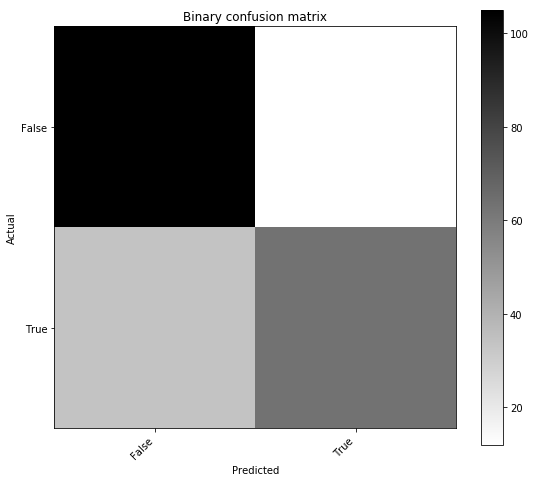

In [41]:
# plot
# -------------------------------------
cm2.plot()
cm2.print_stats()
